In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import os
from fastai.vision import *

In [3]:
!wget https://he-public-data.s3-ap-southeast-1.amazonaws.com/HE_Challenge_data.zip

--2020-06-21 12:58:54--  https://he-public-data.s3-ap-southeast-1.amazonaws.com/HE_Challenge_data.zip
Resolving he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)... 52.219.132.119
Connecting to he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)|52.219.132.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 948965311 (905M) [application/zip]
Saving to: ‘HE_Challenge_data.zip’

HE_Challenge_data.z 100%[===================>] 905.00M  10.3MB/s    in 92s     

2020-06-21 13:00:27 (9.89 MB/s) - ‘HE_Challenge_data.zip’ saved [948965311/948965311]



In [4]:
!unzip HE_Challenge_data.zip

Archive:  HE_Challenge_data.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
   creating: data/test/
  inflating: data/test/.DS_Store     
  inflating: data/test/18540.jpg     
  inflating: data/test/18541.jpg     
  inflating: data/test/18542.jpg     
  inflating: data/test/18543.jpg     
  inflating: data/test/18544.jpg     
  inflating: data/test/18545.jpg     
  inflating: data/test/18546.jpg     
  inflating: data/test/18547.jpg     
  inflating: data/test/18548.jpg     
  inflating: data/test/18549.jpg     
  inflating: data/test/18550.jpg     
  inflating: data/test/18551.jpg     
  inflating: data/test/18552.jpg     
  inflating: data/test/18553.jpg     
  inflating: data/test/18554.jpg     
  inflating: data/test/18555.jpg     
  inflating: data/test/18556.jpg     
  inflating: data/test/18557.jpg     
  inflating: data/test/18558.jpg     
  inflating: data/test/18559.jpg     
  inflating: data/test/18560.jpg     
  inflating: data/test/18561

  inflating: data/test/18778.jpg     
  inflating: data/test/18779.jpg     
  inflating: data/test/18780.jpg     
  inflating: data/test/18781.jpg     
  inflating: data/test/18782.jpg     
  inflating: data/test/18783.jpg     
  inflating: data/test/18784.jpg     
  inflating: data/test/18785.jpg     
  inflating: data/test/18786.jpg     
  inflating: data/test/18787.jpg     
  inflating: data/test/18788.jpg     
  inflating: data/test/18789.jpg     
  inflating: data/test/18790.jpg     
  inflating: data/test/18791.jpg     
  inflating: data/test/18792.jpg     
  inflating: data/test/18793.jpg     
  inflating: data/test/18794.jpg     
  inflating: data/test/18795.jpg     
  inflating: data/test/18796.jpg     
  inflating: data/test/18797.jpg     
  inflating: data/test/18798.jpg     
  inflating: data/test/18799.jpg     
  inflating: data/test/18800.jpg     
  inflating: data/test/18801.jpg     
  inflating: data/test/18802.jpg     
  inflating: data/test/18803.jpg     
  inflating:

  inflating: data/test/19086.jpg     
  inflating: data/test/19087.jpg     
  inflating: data/test/19088.jpg     
  inflating: data/test/19089.jpg     
  inflating: data/test/19090.jpg     
  inflating: data/test/19091.jpg     
  inflating: data/test/19092.jpg     
  inflating: data/test/19093.jpg     
  inflating: data/test/19094.jpg     
  inflating: data/test/19095.jpg     
  inflating: data/test/19096.jpg     
  inflating: data/test/19097.jpg     
  inflating: data/test/19098.jpg     
  inflating: data/test/19099.jpg     
  inflating: data/test/19100.jpg     
  inflating: data/test/19101.jpg     
  inflating: data/test/19102.jpg     
  inflating: data/test/19103.jpg     
  inflating: data/test/19104.jpg     
  inflating: data/test/19105.jpg     
  inflating: data/test/19106.jpg     
  inflating: data/test/19107.jpg     
  inflating: data/test/19108.jpg     
  inflating: data/test/19109.jpg     
  inflating: data/test/19110.jpg     
  inflating: data/test/19111.jpg     
  inflating:

  inflating: data/test/19393.jpg     
  inflating: data/test/19394.jpg     
  inflating: data/test/19395.jpg     
  inflating: data/test/19396.jpg     
  inflating: data/test/19397.jpg     
  inflating: data/test/19398.jpg     
  inflating: data/test/19399.jpg     
  inflating: data/test/19400.jpg     
  inflating: data/test/19401.jpg     
  inflating: data/test/19402.jpg     
  inflating: data/test/19403.jpg     
  inflating: data/test/19404.jpg     
  inflating: data/test/19405.jpg     
  inflating: data/test/19406.jpg     
  inflating: data/test/19407.jpg     
  inflating: data/test/19408.jpg     
  inflating: data/test/19409.jpg     
  inflating: data/test/19410.jpg     
  inflating: data/test/19411.jpg     
  inflating: data/test/19412.jpg     
  inflating: data/test/19413.jpg     
  inflating: data/test/19414.jpg     
  inflating: data/test/19415.jpg     
  inflating: data/test/19416.jpg     
  inflating: data/test/19417.jpg     
  inflating: data/test/19418.jpg     
  inflating:

  inflating: data/test/19703.jpg     
  inflating: data/test/19704.jpg     
  inflating: data/test/19705.jpg     
  inflating: data/test/19706.jpg     
  inflating: data/test/19707.jpg     
  inflating: data/test/19708.jpg     
  inflating: data/test/19709.jpg     
  inflating: data/test/19710.jpg     
  inflating: data/test/19711.jpg     
  inflating: data/test/19712.jpg     
  inflating: data/test/19713.jpg     
  inflating: data/test/19714.jpg     
  inflating: data/test/19715.jpg     
  inflating: data/test/19716.jpg     
  inflating: data/test/19717.jpg     
  inflating: data/test/19718.jpg     
  inflating: data/test/19719.jpg     
  inflating: data/test/19720.jpg     
  inflating: data/test/19721.jpg     
  inflating: data/test/19722.jpg     
  inflating: data/test/19723.jpg     
  inflating: data/test/19724.jpg     
  inflating: data/test/19725.jpg     
  inflating: data/test/19726.jpg     
  inflating: data/test/19727.jpg     
  inflating: data/test/19728.jpg     
  inflating:

  inflating: data/test/20014.jpg     
  inflating: data/test/20015.jpg     
  inflating: data/test/20016.jpg     
  inflating: data/test/20017.jpg     
  inflating: data/test/20018.jpg     
  inflating: data/test/20019.jpg     
  inflating: data/test/20020.jpg     
  inflating: data/test/20021.jpg     
  inflating: data/test/20022.jpg     
  inflating: data/test/20023.jpg     
  inflating: data/test/20024.jpg     
  inflating: data/test/20025.jpg     
  inflating: data/test/20026.jpg     
  inflating: data/test/20027.jpg     
  inflating: data/test/20028.jpg     
  inflating: data/test/20029.jpg     
  inflating: data/test/20030.jpg     
  inflating: data/test/20031.jpg     
  inflating: data/test/20032.jpg     
  inflating: data/test/20033.jpg     
  inflating: data/test/20034.jpg     
  inflating: data/test/20035.jpg     
  inflating: data/test/20036.jpg     
  inflating: data/test/20037.jpg     
  inflating: data/test/20038.jpg     
  inflating: data/test/20039.jpg     
  inflating:

  inflating: data/test/20287.jpg     
  inflating: data/test/20288.jpg     
  inflating: data/test/20289.jpg     
  inflating: data/test/20290.jpg     
  inflating: data/test/20291.jpg     
  inflating: data/test/20292.jpg     
  inflating: data/test/20293.jpg     
  inflating: data/test/20294.jpg     
  inflating: data/test/20295.jpg     
  inflating: data/test/20296.jpg     
  inflating: data/test/20297.jpg     
  inflating: data/test/20298.jpg     
  inflating: data/test/20299.jpg     
  inflating: data/test/20300.jpg     
  inflating: data/test/20301.jpg     
  inflating: data/test/20302.jpg     
  inflating: data/test/20303.jpg     
  inflating: data/test/20304.jpg     
  inflating: data/test/20305.jpg     
  inflating: data/test/20306.jpg     
  inflating: data/test/20307.jpg     
  inflating: data/test/20308.jpg     
  inflating: data/test/20309.jpg     
  inflating: data/test/20310.jpg     
  inflating: data/test/20311.jpg     
  inflating: data/test/20312.jpg     
  inflating:

  inflating: data/train/10003.jpg    
  inflating: data/train/10004.jpg    
  inflating: data/train/10005.jpg    
  inflating: data/train/10006.jpg    
  inflating: data/train/10007.jpg    
  inflating: data/train/10008.jpg    
  inflating: data/train/10009.jpg    
  inflating: data/train/1001.jpg     
  inflating: data/train/10010.jpg    
  inflating: data/train/10011.jpg    
  inflating: data/train/10012.jpg    
  inflating: data/train/10013.jpg    
  inflating: data/train/10014.jpg    
  inflating: data/train/10015.jpg    
  inflating: data/train/10016.jpg    
  inflating: data/train/10017.jpg    
  inflating: data/train/10018.jpg    
  inflating: data/train/10019.jpg    
  inflating: data/train/1002.jpg     
  inflating: data/train/10020.jpg    
  inflating: data/train/10021.jpg    
  inflating: data/train/10022.jpg    
  inflating: data/train/10023.jpg    
  inflating: data/train/10024.jpg    
  inflating: data/train/10025.jpg    
  inflating: data/train/10026.jpg    
  inflating:

  inflating: data/train/10287.jpg    
  inflating: data/train/10288.jpg    
  inflating: data/train/10289.jpg    
  inflating: data/train/1029.jpg     
  inflating: data/train/10290.jpg    
  inflating: data/train/10291.jpg    
  inflating: data/train/10292.jpg    
  inflating: data/train/10293.jpg    
  inflating: data/train/10294.jpg    
  inflating: data/train/10295.jpg    
  inflating: data/train/10296.jpg    
  inflating: data/train/10297.jpg    
  inflating: data/train/10298.jpg    
  inflating: data/train/10299.jpg    
  inflating: data/train/103.jpg      
  inflating: data/train/1030.jpg     
  inflating: data/train/10300.jpg    
  inflating: data/train/10301.jpg    
  inflating: data/train/10302.jpg    
  inflating: data/train/10303.jpg    
  inflating: data/train/10304.jpg    
  inflating: data/train/10305.jpg    
  inflating: data/train/10306.jpg    
  inflating: data/train/10307.jpg    
  inflating: data/train/10308.jpg    
  inflating: data/train/10309.jpg    
  inflating:

  inflating: data/train/10538.jpg    
  inflating: data/train/10539.jpg    
  inflating: data/train/1054.jpg     
  inflating: data/train/10540.jpg    
  inflating: data/train/10541.jpg    
  inflating: data/train/10542.jpg    
  inflating: data/train/10543.jpg    
  inflating: data/train/10544.jpg    
  inflating: data/train/10545.jpg    
  inflating: data/train/10546.jpg    
  inflating: data/train/10547.jpg    
  inflating: data/train/10548.jpg    
  inflating: data/train/10549.jpg    
  inflating: data/train/1055.jpg     
  inflating: data/train/10550.jpg    
  inflating: data/train/10551.jpg    
  inflating: data/train/10552.jpg    
  inflating: data/train/10553.jpg    
  inflating: data/train/10554.jpg    
  inflating: data/train/10555.jpg    
  inflating: data/train/10556.jpg    
  inflating: data/train/10557.jpg    
  inflating: data/train/10558.jpg    
  inflating: data/train/10559.jpg    
  inflating: data/train/1056.jpg     
  inflating: data/train/10560.jpg    
  inflating:

  inflating: data/train/10759.jpg    
  inflating: data/train/1076.jpg     
  inflating: data/train/10760.jpg    
  inflating: data/train/10761.jpg    
  inflating: data/train/10762.jpg    
  inflating: data/train/10763.jpg    
  inflating: data/train/10764.jpg    
  inflating: data/train/10765.jpg    
  inflating: data/train/10766.jpg    
  inflating: data/train/10767.jpg    
  inflating: data/train/10768.jpg    
  inflating: data/train/10769.jpg    
  inflating: data/train/1077.jpg     
  inflating: data/train/10770.jpg    
  inflating: data/train/10771.jpg    
  inflating: data/train/10772.jpg    
  inflating: data/train/10773.jpg    
  inflating: data/train/10774.jpg    
  inflating: data/train/10775.jpg    
  inflating: data/train/10776.jpg    
  inflating: data/train/10777.jpg    
  inflating: data/train/10778.jpg    
  inflating: data/train/10779.jpg    
  inflating: data/train/1078.jpg     
  inflating: data/train/10780.jpg    
  inflating: data/train/10781.jpg    
  inflating:

  inflating: data/train/11031.jpg    
  inflating: data/train/11032.jpg    
  inflating: data/train/11033.jpg    
  inflating: data/train/11034.jpg    
  inflating: data/train/11035.jpg    
  inflating: data/train/11036.jpg    
  inflating: data/train/11037.jpg    
  inflating: data/train/11038.jpg    
  inflating: data/train/11039.jpg    
  inflating: data/train/1104.jpg     
  inflating: data/train/11040.jpg    
  inflating: data/train/11041.jpg    
  inflating: data/train/11042.jpg    
  inflating: data/train/11043.jpg    
  inflating: data/train/11044.jpg    
  inflating: data/train/11045.jpg    
  inflating: data/train/11046.jpg    
  inflating: data/train/11047.jpg    
  inflating: data/train/11048.jpg    
  inflating: data/train/11049.jpg    
  inflating: data/train/1105.jpg     
  inflating: data/train/11050.jpg    
  inflating: data/train/11051.jpg    
  inflating: data/train/11052.jpg    
  inflating: data/train/11053.jpg    
  inflating: data/train/11054.jpg    
  inflating:

  inflating: data/train/11311.jpg    
  inflating: data/train/11312.jpg    
  inflating: data/train/11313.jpg    
  inflating: data/train/11314.jpg    
  inflating: data/train/11315.jpg    
  inflating: data/train/11316.jpg    
  inflating: data/train/11317.jpg    
  inflating: data/train/11318.jpg    
  inflating: data/train/11319.jpg    
  inflating: data/train/1132.jpg     
  inflating: data/train/11320.jpg    
  inflating: data/train/11321.jpg    
  inflating: data/train/11322.jpg    
  inflating: data/train/11323.jpg    
  inflating: data/train/11324.jpg    
  inflating: data/train/11325.jpg    
  inflating: data/train/11326.jpg    
  inflating: data/train/11327.jpg    
  inflating: data/train/11328.jpg    
  inflating: data/train/11329.jpg    
  inflating: data/train/1133.jpg     
  inflating: data/train/11330.jpg    
  inflating: data/train/11331.jpg    
  inflating: data/train/11332.jpg    
  inflating: data/train/11333.jpg    
  inflating: data/train/11334.jpg    
  inflating:

  inflating: data/train/1159.jpg     
  inflating: data/train/11590.jpg    
  inflating: data/train/11591.jpg    
  inflating: data/train/11592.jpg    
  inflating: data/train/11593.jpg    
  inflating: data/train/11594.jpg    
  inflating: data/train/11595.jpg    
  inflating: data/train/11596.jpg    
  inflating: data/train/11597.jpg    
  inflating: data/train/11598.jpg    
  inflating: data/train/11599.jpg    
  inflating: data/train/116.jpg      
  inflating: data/train/1160.jpg     
  inflating: data/train/11600.jpg    
  inflating: data/train/11601.jpg    
  inflating: data/train/11602.jpg    
  inflating: data/train/11603.jpg    
  inflating: data/train/11604.jpg    
  inflating: data/train/11605.jpg    
  inflating: data/train/11606.jpg    
  inflating: data/train/11607.jpg    
  inflating: data/train/11608.jpg    
  inflating: data/train/11609.jpg    
  inflating: data/train/1161.jpg     
  inflating: data/train/11610.jpg    
  inflating: data/train/11611.jpg    
  inflating:

  inflating: data/train/11870.jpg    
  inflating: data/train/11871.jpg    
  inflating: data/train/11872.jpg    
  inflating: data/train/11873.jpg    
  inflating: data/train/11874.jpg    
  inflating: data/train/11875.jpg    
  inflating: data/train/11876.jpg    
  inflating: data/train/11877.jpg    
  inflating: data/train/11878.jpg    
  inflating: data/train/11879.jpg    
  inflating: data/train/1188.jpg     
  inflating: data/train/11880.jpg    
  inflating: data/train/11881.jpg    
  inflating: data/train/11882.jpg    
  inflating: data/train/11883.jpg    
  inflating: data/train/11884.jpg    
  inflating: data/train/11885.jpg    
  inflating: data/train/11886.jpg    
  inflating: data/train/11887.jpg    
  inflating: data/train/11888.jpg    
  inflating: data/train/11889.jpg    
  inflating: data/train/1189.jpg     
  inflating: data/train/11890.jpg    
  inflating: data/train/11891.jpg    
  inflating: data/train/11892.jpg    
  inflating: data/train/11893.jpg    
  inflating:

  inflating: data/train/12150.jpg    
  inflating: data/train/12151.jpg    
  inflating: data/train/12152.jpg    
  inflating: data/train/12153.jpg    
  inflating: data/train/12154.jpg    
  inflating: data/train/12155.jpg    
  inflating: data/train/12156.jpg    
  inflating: data/train/12157.jpg    
  inflating: data/train/12158.jpg    
  inflating: data/train/12159.jpg    
  inflating: data/train/1216.jpg     
  inflating: data/train/12160.jpg    
  inflating: data/train/12161.jpg    
  inflating: data/train/12162.jpg    
  inflating: data/train/12163.jpg    
  inflating: data/train/12164.jpg    
  inflating: data/train/12165.jpg    
  inflating: data/train/12166.jpg    
  inflating: data/train/12167.jpg    
  inflating: data/train/12168.jpg    
  inflating: data/train/12169.jpg    
  inflating: data/train/1217.jpg     
  inflating: data/train/12170.jpg    
  inflating: data/train/12171.jpg    
  inflating: data/train/12172.jpg    
  inflating: data/train/12173.jpg    
  inflating:

  inflating: data/train/12432.jpg    
  inflating: data/train/12433.jpg    
  inflating: data/train/12434.jpg    
  inflating: data/train/12435.jpg    
  inflating: data/train/12436.jpg    
  inflating: data/train/12437.jpg    
  inflating: data/train/12438.jpg    
  inflating: data/train/12439.jpg    
  inflating: data/train/1244.jpg     
  inflating: data/train/12440.jpg    
  inflating: data/train/12441.jpg    
  inflating: data/train/12442.jpg    
  inflating: data/train/12443.jpg    
  inflating: data/train/12444.jpg    
  inflating: data/train/12445.jpg    
  inflating: data/train/12446.jpg    
  inflating: data/train/12447.jpg    
  inflating: data/train/12448.jpg    
  inflating: data/train/12449.jpg    
  inflating: data/train/1245.jpg     
  inflating: data/train/12450.jpg    
  inflating: data/train/12451.jpg    
  inflating: data/train/12452.jpg    
  inflating: data/train/12453.jpg    
  inflating: data/train/12454.jpg    
  inflating: data/train/12455.jpg    
  inflating:

  inflating: data/train/12718.jpg    
  inflating: data/train/12719.jpg    
  inflating: data/train/1272.jpg     
  inflating: data/train/12720.jpg    
  inflating: data/train/12721.jpg    
  inflating: data/train/12722.jpg    
  inflating: data/train/12723.jpg    
  inflating: data/train/12724.jpg    
  inflating: data/train/12725.jpg    
  inflating: data/train/12726.jpg    
  inflating: data/train/12727.jpg    
  inflating: data/train/12728.jpg    
  inflating: data/train/12729.jpg    
  inflating: data/train/1273.jpg     
  inflating: data/train/12730.jpg    
  inflating: data/train/12731.jpg    
  inflating: data/train/12732.jpg    
  inflating: data/train/12733.jpg    
  inflating: data/train/12734.jpg    
  inflating: data/train/12735.jpg    
  inflating: data/train/12736.jpg    
  inflating: data/train/12737.jpg    
  inflating: data/train/12738.jpg    
  inflating: data/train/12739.jpg    
  inflating: data/train/1274.jpg     
  inflating: data/train/12740.jpg    
  inflating:

  inflating: data/train/13005.jpg    
  inflating: data/train/13006.jpg    
  inflating: data/train/13007.jpg    
  inflating: data/train/13008.jpg    
  inflating: data/train/13009.jpg    
  inflating: data/train/1301.jpg     
  inflating: data/train/13010.jpg    
  inflating: data/train/13011.jpg    
  inflating: data/train/13012.jpg    
  inflating: data/train/13013.jpg    
  inflating: data/train/13014.jpg    
  inflating: data/train/13015.jpg    
  inflating: data/train/13016.jpg    
  inflating: data/train/13017.jpg    
  inflating: data/train/13018.jpg    
  inflating: data/train/13019.jpg    
  inflating: data/train/1302.jpg     
  inflating: data/train/13020.jpg    
  inflating: data/train/13021.jpg    
  inflating: data/train/13022.jpg    
  inflating: data/train/13023.jpg    
  inflating: data/train/13024.jpg    
  inflating: data/train/13025.jpg    
  inflating: data/train/13026.jpg    
  inflating: data/train/13027.jpg    
  inflating: data/train/13028.jpg    
  inflating:

  inflating: data/train/13251.jpg    
  inflating: data/train/13252.jpg    
  inflating: data/train/13253.jpg    
  inflating: data/train/13254.jpg    
  inflating: data/train/13255.jpg    
  inflating: data/train/13256.jpg    
  inflating: data/train/13257.jpg    
  inflating: data/train/13258.jpg    
  inflating: data/train/13259.jpg    
  inflating: data/train/1326.jpg     
  inflating: data/train/13260.jpg    
  inflating: data/train/13261.jpg    
  inflating: data/train/13262.jpg    
  inflating: data/train/13263.jpg    
  inflating: data/train/13264.jpg    
  inflating: data/train/13265.jpg    
  inflating: data/train/13266.jpg    
  inflating: data/train/13267.jpg    
  inflating: data/train/13268.jpg    
  inflating: data/train/13269.jpg    
  inflating: data/train/1327.jpg     
  inflating: data/train/13270.jpg    
  inflating: data/train/13271.jpg    
  inflating: data/train/13272.jpg    
  inflating: data/train/13273.jpg    
  inflating: data/train/13274.jpg    
  inflating:

  inflating: data/train/13463.jpg    
  inflating: data/train/13464.jpg    
  inflating: data/train/13465.jpg    
  inflating: data/train/13466.jpg    
  inflating: data/train/13467.jpg    
  inflating: data/train/13468.jpg    
  inflating: data/train/13469.jpg    
  inflating: data/train/1347.jpg     
  inflating: data/train/13470.jpg    
  inflating: data/train/13471.jpg    
  inflating: data/train/13472.jpg    
  inflating: data/train/13473.jpg    
  inflating: data/train/13474.jpg    
  inflating: data/train/13475.jpg    
  inflating: data/train/13476.jpg    
  inflating: data/train/13477.jpg    
  inflating: data/train/13478.jpg    
  inflating: data/train/13479.jpg    
  inflating: data/train/1348.jpg     
  inflating: data/train/13480.jpg    
  inflating: data/train/13481.jpg    
  inflating: data/train/13482.jpg    
  inflating: data/train/13483.jpg    
  inflating: data/train/13484.jpg    
  inflating: data/train/13485.jpg    
  inflating: data/train/13486.jpg    
  inflating:

  inflating: data/train/13665.jpg    
  inflating: data/train/13666.jpg    
  inflating: data/train/13667.jpg    
  inflating: data/train/13668.jpg    
  inflating: data/train/13669.jpg    
  inflating: data/train/1367.jpg     
  inflating: data/train/13670.jpg    
  inflating: data/train/13671.jpg    
  inflating: data/train/13672.jpg    
  inflating: data/train/13673.jpg    
  inflating: data/train/13674.jpg    
  inflating: data/train/13675.jpg    
  inflating: data/train/13676.jpg    
  inflating: data/train/13677.jpg    
  inflating: data/train/13678.jpg    
  inflating: data/train/13679.jpg    
  inflating: data/train/1368.jpg     
  inflating: data/train/13680.jpg    
  inflating: data/train/13681.jpg    
  inflating: data/train/13682.jpg    
  inflating: data/train/13683.jpg    
  inflating: data/train/13684.jpg    
  inflating: data/train/13685.jpg    
  inflating: data/train/13686.jpg    
  inflating: data/train/13687.jpg    
  inflating: data/train/13688.jpg    
  inflating:

  inflating: data/train/13883.jpg    
  inflating: data/train/13884.jpg    
  inflating: data/train/13885.jpg    
  inflating: data/train/13886.jpg    
  inflating: data/train/13887.jpg    
  inflating: data/train/13888.jpg    
  inflating: data/train/13889.jpg    
  inflating: data/train/1389.jpg     
  inflating: data/train/13890.jpg    
  inflating: data/train/13891.jpg    
  inflating: data/train/13892.jpg    
  inflating: data/train/13893.jpg    
  inflating: data/train/13894.jpg    
  inflating: data/train/13895.jpg    
  inflating: data/train/13896.jpg    
  inflating: data/train/13897.jpg    
  inflating: data/train/13898.jpg    
  inflating: data/train/13899.jpg    
  inflating: data/train/139.jpg      
  inflating: data/train/1390.jpg     
  inflating: data/train/13900.jpg    
  inflating: data/train/13901.jpg    
  inflating: data/train/13902.jpg    
  inflating: data/train/13903.jpg    
  inflating: data/train/13904.jpg    
  inflating: data/train/13905.jpg    
  inflating:

  inflating: data/train/14092.jpg    
  inflating: data/train/14093.jpg    
  inflating: data/train/14094.jpg    
  inflating: data/train/14095.jpg    
  inflating: data/train/14096.jpg    
  inflating: data/train/14097.jpg    
  inflating: data/train/14098.jpg    
  inflating: data/train/14099.jpg    
  inflating: data/train/141.jpg      
  inflating: data/train/1410.jpg     
  inflating: data/train/14100.jpg    
  inflating: data/train/14101.jpg    
  inflating: data/train/14102.jpg    
  inflating: data/train/14103.jpg    
  inflating: data/train/14104.jpg    
  inflating: data/train/14105.jpg    
  inflating: data/train/14106.jpg    
  inflating: data/train/14107.jpg    
  inflating: data/train/14108.jpg    
  inflating: data/train/14109.jpg    
  inflating: data/train/1411.jpg     
  inflating: data/train/14110.jpg    
  inflating: data/train/14111.jpg    
  inflating: data/train/14112.jpg    
  inflating: data/train/14113.jpg    
  inflating: data/train/14114.jpg    
  inflating:

  inflating: data/train/14371.jpg    
  inflating: data/train/14372.jpg    
  inflating: data/train/14373.jpg    
  inflating: data/train/14374.jpg    
  inflating: data/train/14375.jpg    
  inflating: data/train/14376.jpg    
  inflating: data/train/14377.jpg    
  inflating: data/train/14378.jpg    
  inflating: data/train/14379.jpg    
  inflating: data/train/1438.jpg     
  inflating: data/train/14380.jpg    
  inflating: data/train/14381.jpg    
  inflating: data/train/14382.jpg    
  inflating: data/train/14383.jpg    
  inflating: data/train/14384.jpg    
  inflating: data/train/14385.jpg    
  inflating: data/train/14386.jpg    
  inflating: data/train/14387.jpg    
  inflating: data/train/14388.jpg    
  inflating: data/train/14389.jpg    
  inflating: data/train/1439.jpg     
  inflating: data/train/14390.jpg    
  inflating: data/train/14391.jpg    
  inflating: data/train/14392.jpg    
  inflating: data/train/14393.jpg    
  inflating: data/train/14394.jpg    
  inflating:

  inflating: data/train/14595.jpg    
  inflating: data/train/14596.jpg    
  inflating: data/train/14597.jpg    
  inflating: data/train/14598.jpg    
  inflating: data/train/14599.jpg    
  inflating: data/train/146.jpg      
  inflating: data/train/1460.jpg     
  inflating: data/train/14600.jpg    
  inflating: data/train/14601.jpg    
  inflating: data/train/14602.jpg    
  inflating: data/train/14603.jpg    
  inflating: data/train/14604.jpg    
  inflating: data/train/14605.jpg    
  inflating: data/train/14606.jpg    
  inflating: data/train/14607.jpg    
  inflating: data/train/14608.jpg    
  inflating: data/train/14609.jpg    
  inflating: data/train/1461.jpg     
  inflating: data/train/14610.jpg    
  inflating: data/train/14611.jpg    
  inflating: data/train/14612.jpg    
  inflating: data/train/14613.jpg    
  inflating: data/train/14614.jpg    
  inflating: data/train/14615.jpg    
  inflating: data/train/14616.jpg    
  inflating: data/train/14617.jpg    
  inflating:

  inflating: data/train/14867.jpg    
  inflating: data/train/14868.jpg    
  inflating: data/train/14869.jpg    
  inflating: data/train/1487.jpg     
  inflating: data/train/14870.jpg    
  inflating: data/train/14871.jpg    
  inflating: data/train/14872.jpg    
  inflating: data/train/14873.jpg    
  inflating: data/train/14874.jpg    
  inflating: data/train/14875.jpg    
  inflating: data/train/14876.jpg    
  inflating: data/train/14877.jpg    
  inflating: data/train/14878.jpg    
  inflating: data/train/14879.jpg    
  inflating: data/train/1488.jpg     
  inflating: data/train/14880.jpg    
  inflating: data/train/14881.jpg    
  inflating: data/train/14882.jpg    
  inflating: data/train/14883.jpg    
  inflating: data/train/14884.jpg    
  inflating: data/train/14885.jpg    
  inflating: data/train/14886.jpg    
  inflating: data/train/14887.jpg    
  inflating: data/train/14888.jpg    
  inflating: data/train/14889.jpg    
  inflating: data/train/1489.jpg     
  inflating:

  inflating: data/train/15138.jpg    
  inflating: data/train/15139.jpg    
  inflating: data/train/1514.jpg     
  inflating: data/train/15140.jpg    
  inflating: data/train/15141.jpg    
  inflating: data/train/15142.jpg    
  inflating: data/train/15143.jpg    
  inflating: data/train/15144.jpg    
  inflating: data/train/15145.jpg    
  inflating: data/train/15146.jpg    
  inflating: data/train/15147.jpg    
  inflating: data/train/15148.jpg    
  inflating: data/train/15149.jpg    
  inflating: data/train/1515.jpg     
  inflating: data/train/15150.jpg    
  inflating: data/train/15151.jpg    
  inflating: data/train/15152.jpg    
  inflating: data/train/15153.jpg    
  inflating: data/train/15154.jpg    
  inflating: data/train/15155.jpg    
  inflating: data/train/15156.jpg    
  inflating: data/train/15157.jpg    
  inflating: data/train/15158.jpg    
  inflating: data/train/15159.jpg    
  inflating: data/train/1516.jpg     
  inflating: data/train/15160.jpg    
  inflating:

  inflating: data/train/15333.jpg    
  inflating: data/train/15334.jpg    
  inflating: data/train/15335.jpg    
  inflating: data/train/15336.jpg    
  inflating: data/train/15337.jpg    
  inflating: data/train/15338.jpg    
  inflating: data/train/15339.jpg    
  inflating: data/train/1534.jpg     
  inflating: data/train/15340.jpg    
  inflating: data/train/15341.jpg    
  inflating: data/train/15342.jpg    
  inflating: data/train/15343.jpg    
  inflating: data/train/15344.jpg    
  inflating: data/train/15345.jpg    
  inflating: data/train/15346.jpg    
  inflating: data/train/15347.jpg    
  inflating: data/train/15348.jpg    
  inflating: data/train/15349.jpg    
  inflating: data/train/1535.jpg     
  inflating: data/train/15350.jpg    
  inflating: data/train/15351.jpg    
  inflating: data/train/15352.jpg    
  inflating: data/train/15353.jpg    
  inflating: data/train/15354.jpg    
  inflating: data/train/15355.jpg    
  inflating: data/train/15356.jpg    
  inflating:

  inflating: data/train/15551.jpg    
  inflating: data/train/15552.jpg    
  inflating: data/train/15553.jpg    
  inflating: data/train/15554.jpg    
  inflating: data/train/15555.jpg    
  inflating: data/train/15556.jpg    
  inflating: data/train/15557.jpg    
  inflating: data/train/15558.jpg    
  inflating: data/train/15559.jpg    
  inflating: data/train/1556.jpg     
  inflating: data/train/15560.jpg    
  inflating: data/train/15561.jpg    
  inflating: data/train/15562.jpg    
  inflating: data/train/15563.jpg    
  inflating: data/train/15564.jpg    
  inflating: data/train/15565.jpg    
  inflating: data/train/15566.jpg    
  inflating: data/train/15567.jpg    
  inflating: data/train/15568.jpg    
  inflating: data/train/15569.jpg    
  inflating: data/train/1557.jpg     
  inflating: data/train/15570.jpg    
  inflating: data/train/15571.jpg    
  inflating: data/train/15572.jpg    
  inflating: data/train/15573.jpg    
  inflating: data/train/15574.jpg    
  inflating:

  inflating: data/train/15797.jpg    
  inflating: data/train/15798.jpg    
  inflating: data/train/15799.jpg    
  inflating: data/train/158.jpg      
  inflating: data/train/1580.jpg     
  inflating: data/train/15800.jpg    
  inflating: data/train/15801.jpg    
  inflating: data/train/15802.jpg    
  inflating: data/train/15803.jpg    
  inflating: data/train/15804.jpg    
  inflating: data/train/15805.jpg    
  inflating: data/train/15806.jpg    
  inflating: data/train/15807.jpg    
  inflating: data/train/15808.jpg    
  inflating: data/train/15809.jpg    
  inflating: data/train/1581.jpg     
  inflating: data/train/15810.jpg    
  inflating: data/train/15811.jpg    
  inflating: data/train/15812.jpg    
  inflating: data/train/15813.jpg    
  inflating: data/train/15814.jpg    
  inflating: data/train/15815.jpg    
  inflating: data/train/15816.jpg    
  inflating: data/train/15817.jpg    
  inflating: data/train/15818.jpg    
  inflating: data/train/15819.jpg    
  inflating:

  inflating: data/train/16072.jpg    
  inflating: data/train/16073.jpg    
  inflating: data/train/16074.jpg    
  inflating: data/train/16075.jpg    
  inflating: data/train/16076.jpg    
  inflating: data/train/16077.jpg    
  inflating: data/train/16078.jpg    
  inflating: data/train/16079.jpg    
  inflating: data/train/1608.jpg     
  inflating: data/train/16080.jpg    
  inflating: data/train/16081.jpg    
  inflating: data/train/16082.jpg    
  inflating: data/train/16083.jpg    
  inflating: data/train/16084.jpg    
  inflating: data/train/16085.jpg    
  inflating: data/train/16086.jpg    
  inflating: data/train/16087.jpg    
  inflating: data/train/16088.jpg    
  inflating: data/train/16089.jpg    
  inflating: data/train/1609.jpg     
  inflating: data/train/16090.jpg    
  inflating: data/train/16091.jpg    
  inflating: data/train/16092.jpg    
  inflating: data/train/16093.jpg    
  inflating: data/train/16094.jpg    
  inflating: data/train/16095.jpg    
  inflating:

  inflating: data/train/16345.jpg    
  inflating: data/train/16346.jpg    
  inflating: data/train/16347.jpg    
  inflating: data/train/16348.jpg    
  inflating: data/train/16349.jpg    
  inflating: data/train/1635.jpg     
  inflating: data/train/16350.jpg    
  inflating: data/train/16351.jpg    
  inflating: data/train/16352.jpg    
  inflating: data/train/16353.jpg    
  inflating: data/train/16354.jpg    
  inflating: data/train/16355.jpg    
  inflating: data/train/16356.jpg    
  inflating: data/train/16357.jpg    
  inflating: data/train/16358.jpg    
  inflating: data/train/16359.jpg    
  inflating: data/train/1636.jpg     
  inflating: data/train/16360.jpg    
  inflating: data/train/16361.jpg    
  inflating: data/train/16362.jpg    
  inflating: data/train/16363.jpg    
  inflating: data/train/16364.jpg    
  inflating: data/train/16365.jpg    
  inflating: data/train/16366.jpg    
  inflating: data/train/16367.jpg    
  inflating: data/train/16368.jpg    
  inflating:

  inflating: data/train/1663.jpg     
  inflating: data/train/16630.jpg    
  inflating: data/train/16631.jpg    
  inflating: data/train/16632.jpg    
  inflating: data/train/16633.jpg    
  inflating: data/train/16634.jpg    
  inflating: data/train/16635.jpg    
  inflating: data/train/16636.jpg    
  inflating: data/train/16637.jpg    
  inflating: data/train/16638.jpg    
  inflating: data/train/16639.jpg    
  inflating: data/train/1664.jpg     
  inflating: data/train/16640.jpg    
  inflating: data/train/16641.jpg    
  inflating: data/train/16642.jpg    
  inflating: data/train/16643.jpg    
  inflating: data/train/16644.jpg    
  inflating: data/train/16645.jpg    
  inflating: data/train/16646.jpg    
  inflating: data/train/16647.jpg    
  inflating: data/train/16648.jpg    
  inflating: data/train/16649.jpg    
  inflating: data/train/1665.jpg     
  inflating: data/train/16650.jpg    
  inflating: data/train/16651.jpg    
  inflating: data/train/16652.jpg    
  inflating:

  inflating: data/train/16908.jpg    
  inflating: data/train/16909.jpg    
  inflating: data/train/1691.jpg     
  inflating: data/train/16910.jpg    
  inflating: data/train/16911.jpg    
  inflating: data/train/16912.jpg    
  inflating: data/train/16913.jpg    
  inflating: data/train/16914.jpg    
  inflating: data/train/16915.jpg    
  inflating: data/train/16916.jpg    
  inflating: data/train/16917.jpg    
  inflating: data/train/16918.jpg    
  inflating: data/train/16919.jpg    
  inflating: data/train/1692.jpg     
  inflating: data/train/16920.jpg    
  inflating: data/train/16921.jpg    
  inflating: data/train/16922.jpg    
  inflating: data/train/16923.jpg    
  inflating: data/train/16924.jpg    
  inflating: data/train/16925.jpg    
  inflating: data/train/16926.jpg    
  inflating: data/train/16927.jpg    
  inflating: data/train/16928.jpg    
  inflating: data/train/16929.jpg    
  inflating: data/train/1693.jpg     
  inflating: data/train/16930.jpg    
  inflating:

  inflating: data/train/17186.jpg    
  inflating: data/train/17187.jpg    
  inflating: data/train/17188.jpg    
  inflating: data/train/17189.jpg    
  inflating: data/train/1719.jpg     
  inflating: data/train/17190.jpg    
  inflating: data/train/17191.jpg    
  inflating: data/train/17192.jpg    
  inflating: data/train/17193.jpg    
  inflating: data/train/17194.jpg    
  inflating: data/train/17195.jpg    
  inflating: data/train/17196.jpg    
  inflating: data/train/17197.jpg    
  inflating: data/train/17198.jpg    
  inflating: data/train/17199.jpg    
  inflating: data/train/172.jpg      
  inflating: data/train/1720.jpg     
  inflating: data/train/17200.jpg    
  inflating: data/train/17201.jpg    
  inflating: data/train/17202.jpg    
  inflating: data/train/17203.jpg    
  inflating: data/train/17204.jpg    
  inflating: data/train/17205.jpg    
  inflating: data/train/17206.jpg    
  inflating: data/train/17207.jpg    
  inflating: data/train/17208.jpg    
  inflating:

  inflating: data/train/17466.jpg    
  inflating: data/train/17467.jpg    
  inflating: data/train/17468.jpg    
  inflating: data/train/17469.jpg    
  inflating: data/train/1747.jpg     
  inflating: data/train/17470.jpg    
  inflating: data/train/17471.jpg    
  inflating: data/train/17472.jpg    
  inflating: data/train/17473.jpg    
  inflating: data/train/17474.jpg    
  inflating: data/train/17475.jpg    
  inflating: data/train/17476.jpg    
  inflating: data/train/17477.jpg    
  inflating: data/train/17478.jpg    
  inflating: data/train/17479.jpg    
  inflating: data/train/1748.jpg     
  inflating: data/train/17480.jpg    
  inflating: data/train/17481.jpg    
  inflating: data/train/17482.jpg    
  inflating: data/train/17483.jpg    
  inflating: data/train/17484.jpg    
  inflating: data/train/17485.jpg    
  inflating: data/train/17486.jpg    
  inflating: data/train/17487.jpg    
  inflating: data/train/17488.jpg    
  inflating: data/train/17489.jpg    
  inflating:

  inflating: data/train/17744.jpg    
  inflating: data/train/17745.jpg    
  inflating: data/train/17746.jpg    
  inflating: data/train/17747.jpg    
  inflating: data/train/17748.jpg    
  inflating: data/train/17749.jpg    
  inflating: data/train/1775.jpg     
  inflating: data/train/17750.jpg    
  inflating: data/train/17751.jpg    
  inflating: data/train/17752.jpg    
  inflating: data/train/17753.jpg    
  inflating: data/train/17754.jpg    
  inflating: data/train/17755.jpg    
  inflating: data/train/17756.jpg    
  inflating: data/train/17757.jpg    
  inflating: data/train/17758.jpg    
  inflating: data/train/17759.jpg    
  inflating: data/train/1776.jpg     
  inflating: data/train/17760.jpg    
  inflating: data/train/17761.jpg    
  inflating: data/train/17762.jpg    
  inflating: data/train/17763.jpg    
  inflating: data/train/17764.jpg    
  inflating: data/train/17765.jpg    
  inflating: data/train/17766.jpg    
  inflating: data/train/17767.jpg    
  inflating:

  inflating: data/train/18023.jpg    
  inflating: data/train/18024.jpg    
  inflating: data/train/18025.jpg    
  inflating: data/train/18026.jpg    
  inflating: data/train/18027.jpg    
  inflating: data/train/18028.jpg    
  inflating: data/train/18029.jpg    
  inflating: data/train/1803.jpg     
  inflating: data/train/18030.jpg    
  inflating: data/train/18031.jpg    
  inflating: data/train/18032.jpg    
  inflating: data/train/18033.jpg    
  inflating: data/train/18034.jpg    
  inflating: data/train/18035.jpg    
  inflating: data/train/18036.jpg    
  inflating: data/train/18037.jpg    
  inflating: data/train/18038.jpg    
  inflating: data/train/18039.jpg    
  inflating: data/train/1804.jpg     
  inflating: data/train/18040.jpg    
  inflating: data/train/18041.jpg    
  inflating: data/train/18042.jpg    
  inflating: data/train/18043.jpg    
  inflating: data/train/18044.jpg    
  inflating: data/train/18045.jpg    
  inflating: data/train/18046.jpg    
  inflating:

  inflating: data/train/18300.jpg    
  inflating: data/train/18301.jpg    
  inflating: data/train/18302.jpg    
  inflating: data/train/18303.jpg    
  inflating: data/train/18304.jpg    
  inflating: data/train/18305.jpg    
  inflating: data/train/18306.jpg    
  inflating: data/train/18307.jpg    
  inflating: data/train/18308.jpg    
  inflating: data/train/18309.jpg    
  inflating: data/train/1831.jpg     
  inflating: data/train/18310.jpg    
  inflating: data/train/18311.jpg    
  inflating: data/train/18312.jpg    
  inflating: data/train/18313.jpg    
  inflating: data/train/18314.jpg    
  inflating: data/train/18315.jpg    
  inflating: data/train/18316.jpg    
  inflating: data/train/18317.jpg    
  inflating: data/train/18318.jpg    
  inflating: data/train/18319.jpg    
  inflating: data/train/1832.jpg     
  inflating: data/train/18320.jpg    
  inflating: data/train/18321.jpg    
  inflating: data/train/18322.jpg    
  inflating: data/train/18323.jpg    
  inflating:

  inflating: data/train/1891.jpg     
  inflating: data/train/1892.jpg     
  inflating: data/train/1893.jpg     
  inflating: data/train/1894.jpg     
  inflating: data/train/1895.jpg     
  inflating: data/train/1896.jpg     
  inflating: data/train/1897.jpg     
  inflating: data/train/1898.jpg     
  inflating: data/train/1899.jpg     
  inflating: data/train/19.jpg       
  inflating: data/train/190.jpg      
  inflating: data/train/1900.jpg     
  inflating: data/train/1901.jpg     
  inflating: data/train/1902.jpg     
  inflating: data/train/1903.jpg     
  inflating: data/train/1904.jpg     
  inflating: data/train/1905.jpg     
  inflating: data/train/1906.jpg     
  inflating: data/train/1907.jpg     
  inflating: data/train/1908.jpg     
  inflating: data/train/1909.jpg     
  inflating: data/train/191.jpg      
  inflating: data/train/1910.jpg     
  inflating: data/train/1911.jpg     
  inflating: data/train/1912.jpg     
  inflating: data/train/1913.jpg     
  inflating:

  inflating: data/train/217.jpg      
  inflating: data/train/2170.jpg     
  inflating: data/train/2171.jpg     
  inflating: data/train/2172.jpg     
  inflating: data/train/2173.jpg     
  inflating: data/train/2174.jpg     
  inflating: data/train/2175.jpg     
  inflating: data/train/2176.jpg     
  inflating: data/train/2177.jpg     
  inflating: data/train/2178.jpg     
  inflating: data/train/2179.jpg     
  inflating: data/train/218.jpg      
  inflating: data/train/2180.jpg     
  inflating: data/train/2181.jpg     
  inflating: data/train/2182.jpg     
  inflating: data/train/2183.jpg     
  inflating: data/train/2184.jpg     
  inflating: data/train/2185.jpg     
  inflating: data/train/2186.jpg     
  inflating: data/train/2187.jpg     
  inflating: data/train/2188.jpg     
  inflating: data/train/2189.jpg     
  inflating: data/train/219.jpg      
  inflating: data/train/2190.jpg     
  inflating: data/train/2191.jpg     
  inflating: data/train/2192.jpg     
  inflating:

  inflating: data/train/2449.jpg     
  inflating: data/train/245.jpg      
  inflating: data/train/2450.jpg     
  inflating: data/train/2451.jpg     
  inflating: data/train/2452.jpg     
  inflating: data/train/2453.jpg     
  inflating: data/train/2454.jpg     
  inflating: data/train/2455.jpg     
  inflating: data/train/2456.jpg     
  inflating: data/train/2457.jpg     
  inflating: data/train/2458.jpg     
  inflating: data/train/2459.jpg     
  inflating: data/train/246.jpg      
  inflating: data/train/2460.jpg     
  inflating: data/train/2461.jpg     
  inflating: data/train/2462.jpg     
  inflating: data/train/2463.jpg     
  inflating: data/train/2464.jpg     
  inflating: data/train/2465.jpg     
  inflating: data/train/2466.jpg     
  inflating: data/train/2467.jpg     
  inflating: data/train/2468.jpg     
  inflating: data/train/2469.jpg     
  inflating: data/train/247.jpg      
  inflating: data/train/2470.jpg     
  inflating: data/train/2471.jpg     
  inflating:

  inflating: data/train/2726.jpg     
  inflating: data/train/2727.jpg     
  inflating: data/train/2728.jpg     
  inflating: data/train/2729.jpg     
  inflating: data/train/273.jpg      
  inflating: data/train/2730.jpg     
  inflating: data/train/2731.jpg     
  inflating: data/train/2732.jpg     
  inflating: data/train/2733.jpg     
  inflating: data/train/2734.jpg     
  inflating: data/train/2735.jpg     
  inflating: data/train/2736.jpg     
  inflating: data/train/2737.jpg     
  inflating: data/train/2738.jpg     
  inflating: data/train/2739.jpg     
  inflating: data/train/274.jpg      
  inflating: data/train/2740.jpg     
  inflating: data/train/2741.jpg     
  inflating: data/train/2742.jpg     
  inflating: data/train/2743.jpg     
  inflating: data/train/2744.jpg     
  inflating: data/train/2745.jpg     
  inflating: data/train/2746.jpg     
  inflating: data/train/2747.jpg     
  inflating: data/train/2748.jpg     
  inflating: data/train/2749.jpg     
  inflating:

  inflating: data/train/3.jpg        
  inflating: data/train/30.jpg       
  inflating: data/train/300.jpg      
  inflating: data/train/3000.jpg     
  inflating: data/train/3001.jpg     
  inflating: data/train/3002.jpg     
  inflating: data/train/3003.jpg     
  inflating: data/train/3004.jpg     
  inflating: data/train/3005.jpg     
  inflating: data/train/3006.jpg     
  inflating: data/train/3007.jpg     
  inflating: data/train/3008.jpg     
  inflating: data/train/3009.jpg     
  inflating: data/train/301.jpg      
  inflating: data/train/3010.jpg     
  inflating: data/train/3011.jpg     
  inflating: data/train/3012.jpg     
  inflating: data/train/3013.jpg     
  inflating: data/train/3014.jpg     
  inflating: data/train/3015.jpg     
  inflating: data/train/3016.jpg     
  inflating: data/train/3017.jpg     
  inflating: data/train/3018.jpg     
  inflating: data/train/3019.jpg     
  inflating: data/train/302.jpg      
  inflating: data/train/3020.jpg     
  inflating:

  inflating: data/train/3280.jpg     
  inflating: data/train/3281.jpg     
  inflating: data/train/3282.jpg     
  inflating: data/train/3283.jpg     
  inflating: data/train/3284.jpg     
  inflating: data/train/3285.jpg     
  inflating: data/train/3286.jpg     
  inflating: data/train/3287.jpg     
  inflating: data/train/3288.jpg     
  inflating: data/train/3289.jpg     
  inflating: data/train/329.jpg      
  inflating: data/train/3290.jpg     
  inflating: data/train/3291.jpg     
  inflating: data/train/3292.jpg     
  inflating: data/train/3293.jpg     
  inflating: data/train/3294.jpg     
  inflating: data/train/3295.jpg     
  inflating: data/train/3296.jpg     
  inflating: data/train/3297.jpg     
  inflating: data/train/3298.jpg     
  inflating: data/train/3299.jpg     
  inflating: data/train/33.jpg       
  inflating: data/train/330.jpg      
  inflating: data/train/3300.jpg     
  inflating: data/train/3301.jpg     
  inflating: data/train/3302.jpg     
  inflating:

  inflating: data/train/3565.jpg     
  inflating: data/train/3566.jpg     
  inflating: data/train/3567.jpg     
  inflating: data/train/3568.jpg     
  inflating: data/train/3569.jpg     
  inflating: data/train/357.jpg      
  inflating: data/train/3570.jpg     
  inflating: data/train/3571.jpg     
  inflating: data/train/3572.jpg     
  inflating: data/train/3573.jpg     
  inflating: data/train/3574.jpg     
  inflating: data/train/3575.jpg     
  inflating: data/train/3576.jpg     
  inflating: data/train/3577.jpg     
  inflating: data/train/3578.jpg     
  inflating: data/train/3579.jpg     
  inflating: data/train/358.jpg      
  inflating: data/train/3580.jpg     
  inflating: data/train/3581.jpg     
  inflating: data/train/3582.jpg     
  inflating: data/train/3583.jpg     
  inflating: data/train/3584.jpg     
  inflating: data/train/3585.jpg     
  inflating: data/train/3586.jpg     
  inflating: data/train/3587.jpg     
  inflating: data/train/3588.jpg     
  inflating:

  inflating: data/train/3830.jpg     
  inflating: data/train/3831.jpg     
  inflating: data/train/3832.jpg     
  inflating: data/train/3833.jpg     
  inflating: data/train/3834.jpg     
  inflating: data/train/3835.jpg     
  inflating: data/train/3836.jpg     
  inflating: data/train/3837.jpg     
  inflating: data/train/3838.jpg     
  inflating: data/train/3839.jpg     
  inflating: data/train/384.jpg      
  inflating: data/train/3840.jpg     
  inflating: data/train/3841.jpg     
  inflating: data/train/3842.jpg     
  inflating: data/train/3843.jpg     
  inflating: data/train/3844.jpg     
  inflating: data/train/3845.jpg     
  inflating: data/train/3846.jpg     
  inflating: data/train/3847.jpg     
  inflating: data/train/3848.jpg     
  inflating: data/train/3849.jpg     
  inflating: data/train/385.jpg      
  inflating: data/train/3850.jpg     
  inflating: data/train/3851.jpg     
  inflating: data/train/3852.jpg     
  inflating: data/train/3853.jpg     
  inflating:

  inflating: data/train/4054.jpg     
  inflating: data/train/4055.jpg     
  inflating: data/train/4056.jpg     
  inflating: data/train/4057.jpg     
  inflating: data/train/4058.jpg     
  inflating: data/train/4059.jpg     
  inflating: data/train/406.jpg      
  inflating: data/train/4060.jpg     
  inflating: data/train/4061.jpg     
  inflating: data/train/4062.jpg     
  inflating: data/train/4063.jpg     
  inflating: data/train/4064.jpg     
  inflating: data/train/4065.jpg     
  inflating: data/train/4066.jpg     
  inflating: data/train/4067.jpg     
  inflating: data/train/4068.jpg     
  inflating: data/train/4069.jpg     
  inflating: data/train/407.jpg      
  inflating: data/train/4070.jpg     
  inflating: data/train/4071.jpg     
  inflating: data/train/4072.jpg     
  inflating: data/train/4073.jpg     
  inflating: data/train/4074.jpg     
  inflating: data/train/4075.jpg     
  inflating: data/train/4076.jpg     
  inflating: data/train/4077.jpg     
  inflating:

  inflating: data/train/4281.jpg     
  inflating: data/train/4282.jpg     
  inflating: data/train/4283.jpg     
  inflating: data/train/4284.jpg     
  inflating: data/train/4285.jpg     
  inflating: data/train/4286.jpg     
  inflating: data/train/4287.jpg     
  inflating: data/train/4288.jpg     
  inflating: data/train/4289.jpg     
  inflating: data/train/429.jpg      
  inflating: data/train/4290.jpg     
  inflating: data/train/4291.jpg     
  inflating: data/train/4292.jpg     
  inflating: data/train/4293.jpg     
  inflating: data/train/4294.jpg     
  inflating: data/train/4295.jpg     
  inflating: data/train/4296.jpg     
  inflating: data/train/4297.jpg     
  inflating: data/train/4298.jpg     
  inflating: data/train/4299.jpg     
  inflating: data/train/43.jpg       
  inflating: data/train/430.jpg      
  inflating: data/train/4300.jpg     
  inflating: data/train/4301.jpg     
  inflating: data/train/4302.jpg     
  inflating: data/train/4303.jpg     
  inflating:

  inflating: data/train/4517.jpg     
  inflating: data/train/4518.jpg     
  inflating: data/train/4519.jpg     
  inflating: data/train/452.jpg      
  inflating: data/train/4520.jpg     
  inflating: data/train/4521.jpg     
  inflating: data/train/4522.jpg     
  inflating: data/train/4523.jpg     
  inflating: data/train/4524.jpg     
  inflating: data/train/4525.jpg     
  inflating: data/train/4526.jpg     
  inflating: data/train/4527.jpg     
  inflating: data/train/4528.jpg     
  inflating: data/train/4529.jpg     
  inflating: data/train/453.jpg      
  inflating: data/train/4530.jpg     
  inflating: data/train/4531.jpg     
  inflating: data/train/4532.jpg     
  inflating: data/train/4533.jpg     
  inflating: data/train/4534.jpg     
  inflating: data/train/4535.jpg     
  inflating: data/train/4536.jpg     
  inflating: data/train/4537.jpg     
  inflating: data/train/4538.jpg     
  inflating: data/train/4539.jpg     
  inflating: data/train/454.jpg      
  inflating:

  inflating: data/train/4742.jpg     
  inflating: data/train/4743.jpg     
  inflating: data/train/4744.jpg     
  inflating: data/train/4745.jpg     
  inflating: data/train/4746.jpg     
  inflating: data/train/4747.jpg     
  inflating: data/train/4748.jpg     
  inflating: data/train/4749.jpg     
  inflating: data/train/475.jpg      
  inflating: data/train/4750.jpg     
  inflating: data/train/4751.jpg     
  inflating: data/train/4752.jpg     
  inflating: data/train/4753.jpg     
  inflating: data/train/4754.jpg     
  inflating: data/train/4755.jpg     
  inflating: data/train/4756.jpg     
  inflating: data/train/4757.jpg     
  inflating: data/train/4758.jpg     
  inflating: data/train/4759.jpg     
  inflating: data/train/476.jpg      
  inflating: data/train/4760.jpg     
  inflating: data/train/4761.jpg     
  inflating: data/train/4762.jpg     
  inflating: data/train/4763.jpg     
  inflating: data/train/4764.jpg     
  inflating: data/train/4765.jpg     
  inflating:

  inflating: data/train/4955.jpg     
  inflating: data/train/4956.jpg     
  inflating: data/train/4957.jpg     
  inflating: data/train/4958.jpg     
  inflating: data/train/4959.jpg     
  inflating: data/train/496.jpg      
  inflating: data/train/4960.jpg     
  inflating: data/train/4961.jpg     
  inflating: data/train/4962.jpg     
  inflating: data/train/4963.jpg     
  inflating: data/train/4964.jpg     
  inflating: data/train/4965.jpg     
  inflating: data/train/4966.jpg     
  inflating: data/train/4967.jpg     
  inflating: data/train/4968.jpg     
  inflating: data/train/4969.jpg     
  inflating: data/train/497.jpg      
  inflating: data/train/4970.jpg     
  inflating: data/train/4971.jpg     
  inflating: data/train/4972.jpg     
  inflating: data/train/4973.jpg     
  inflating: data/train/4974.jpg     
  inflating: data/train/4975.jpg     
  inflating: data/train/4976.jpg     
  inflating: data/train/4977.jpg     
  inflating: data/train/4978.jpg     
  inflating:

  inflating: data/train/5187.jpg     
  inflating: data/train/5188.jpg     
  inflating: data/train/5189.jpg     
  inflating: data/train/519.jpg      
  inflating: data/train/5190.jpg     
  inflating: data/train/5191.jpg     
  inflating: data/train/5192.jpg     
  inflating: data/train/5193.jpg     
  inflating: data/train/5194.jpg     
  inflating: data/train/5195.jpg     
  inflating: data/train/5196.jpg     
  inflating: data/train/5197.jpg     
  inflating: data/train/5198.jpg     
  inflating: data/train/5199.jpg     
  inflating: data/train/52.jpg       
  inflating: data/train/520.jpg      
  inflating: data/train/5200.jpg     
  inflating: data/train/5201.jpg     
  inflating: data/train/5202.jpg     
  inflating: data/train/5203.jpg     
  inflating: data/train/5204.jpg     
  inflating: data/train/5205.jpg     
  inflating: data/train/5206.jpg     
  inflating: data/train/5207.jpg     
  inflating: data/train/5208.jpg     
  inflating: data/train/5209.jpg     
  inflating:

  inflating: data/train/546.jpg      
  inflating: data/train/5460.jpg     
  inflating: data/train/5461.jpg     
  inflating: data/train/5462.jpg     
  inflating: data/train/5463.jpg     
  inflating: data/train/5464.jpg     
  inflating: data/train/5465.jpg     
  inflating: data/train/5466.jpg     
  inflating: data/train/5467.jpg     
  inflating: data/train/5468.jpg     
  inflating: data/train/5469.jpg     
  inflating: data/train/547.jpg      
  inflating: data/train/5470.jpg     
  inflating: data/train/5471.jpg     
  inflating: data/train/5472.jpg     
  inflating: data/train/5473.jpg     
  inflating: data/train/5474.jpg     
  inflating: data/train/5475.jpg     
  inflating: data/train/5476.jpg     
  inflating: data/train/5477.jpg     
  inflating: data/train/5478.jpg     
  inflating: data/train/5479.jpg     
  inflating: data/train/548.jpg      
  inflating: data/train/5480.jpg     
  inflating: data/train/5481.jpg     
  inflating: data/train/5482.jpg     
  inflating:

  inflating: data/train/572.jpg      
  inflating: data/train/5720.jpg     
  inflating: data/train/5721.jpg     
  inflating: data/train/5722.jpg     
  inflating: data/train/5723.jpg     
  inflating: data/train/5724.jpg     
  inflating: data/train/5725.jpg     
  inflating: data/train/5726.jpg     
  inflating: data/train/5727.jpg     
  inflating: data/train/5728.jpg     
  inflating: data/train/5729.jpg     
  inflating: data/train/573.jpg      
  inflating: data/train/5730.jpg     
  inflating: data/train/5731.jpg     
  inflating: data/train/5732.jpg     
  inflating: data/train/5733.jpg     
  inflating: data/train/5734.jpg     
  inflating: data/train/5735.jpg     
  inflating: data/train/5736.jpg     
  inflating: data/train/5737.jpg     
  inflating: data/train/5738.jpg     
  inflating: data/train/5739.jpg     
  inflating: data/train/574.jpg      
  inflating: data/train/5740.jpg     
  inflating: data/train/5741.jpg     
  inflating: data/train/5742.jpg     
  inflating:

  inflating: data/train/5990.jpg     
  inflating: data/train/5991.jpg     
  inflating: data/train/5992.jpg     
  inflating: data/train/5993.jpg     
  inflating: data/train/5994.jpg     
  inflating: data/train/5995.jpg     
  inflating: data/train/5996.jpg     
  inflating: data/train/5997.jpg     
  inflating: data/train/5998.jpg     
  inflating: data/train/5999.jpg     
  inflating: data/train/6.jpg        
  inflating: data/train/60.jpg       
  inflating: data/train/600.jpg      
  inflating: data/train/6000.jpg     
  inflating: data/train/6001.jpg     
  inflating: data/train/6002.jpg     
  inflating: data/train/6003.jpg     
  inflating: data/train/6004.jpg     
  inflating: data/train/6005.jpg     
  inflating: data/train/6006.jpg     
  inflating: data/train/6007.jpg     
  inflating: data/train/6008.jpg     
  inflating: data/train/6009.jpg     
  inflating: data/train/601.jpg      
  inflating: data/train/6010.jpg     
  inflating: data/train/6011.jpg     
  inflating:

  inflating: data/train/6250.jpg     
  inflating: data/train/6251.jpg     
  inflating: data/train/6252.jpg     
  inflating: data/train/6253.jpg     
  inflating: data/train/6254.jpg     
  inflating: data/train/6255.jpg     
  inflating: data/train/6256.jpg     
  inflating: data/train/6257.jpg     
  inflating: data/train/6258.jpg     
  inflating: data/train/6259.jpg     
  inflating: data/train/626.jpg      
  inflating: data/train/6260.jpg     
  inflating: data/train/6261.jpg     
  inflating: data/train/6262.jpg     
  inflating: data/train/6263.jpg     
  inflating: data/train/6264.jpg     
  inflating: data/train/6265.jpg     
  inflating: data/train/6266.jpg     
  inflating: data/train/6267.jpg     
  inflating: data/train/6268.jpg     
  inflating: data/train/6269.jpg     
  inflating: data/train/627.jpg      
  inflating: data/train/6270.jpg     
  inflating: data/train/6271.jpg     
  inflating: data/train/6272.jpg     
  inflating: data/train/6273.jpg     
  inflating:

  inflating: data/train/6532.jpg     
  inflating: data/train/6533.jpg     
  inflating: data/train/6534.jpg     
  inflating: data/train/6535.jpg     
  inflating: data/train/6536.jpg     
  inflating: data/train/6537.jpg     
  inflating: data/train/6538.jpg     
  inflating: data/train/6539.jpg     
  inflating: data/train/654.jpg      
  inflating: data/train/6540.jpg     
  inflating: data/train/6541.jpg     
  inflating: data/train/6542.jpg     
  inflating: data/train/6543.jpg     
  inflating: data/train/6544.jpg     
  inflating: data/train/6545.jpg     
  inflating: data/train/6546.jpg     
  inflating: data/train/6547.jpg     
  inflating: data/train/6548.jpg     
  inflating: data/train/6549.jpg     
  inflating: data/train/655.jpg      
  inflating: data/train/6550.jpg     
  inflating: data/train/6551.jpg     
  inflating: data/train/6552.jpg     
  inflating: data/train/6553.jpg     
  inflating: data/train/6554.jpg     
  inflating: data/train/6555.jpg     
  inflating:

  inflating: data/train/6727.jpg     
  inflating: data/train/6728.jpg     
  inflating: data/train/6729.jpg     
  inflating: data/train/673.jpg      
  inflating: data/train/6730.jpg     
  inflating: data/train/6731.jpg     
  inflating: data/train/6732.jpg     
  inflating: data/train/6733.jpg     
  inflating: data/train/6734.jpg     
  inflating: data/train/6735.jpg     
  inflating: data/train/6736.jpg     
  inflating: data/train/6737.jpg     
  inflating: data/train/6738.jpg     
  inflating: data/train/6739.jpg     
  inflating: data/train/674.jpg      
  inflating: data/train/6740.jpg     
  inflating: data/train/6741.jpg     
  inflating: data/train/6742.jpg     
  inflating: data/train/6743.jpg     
  inflating: data/train/6744.jpg     
  inflating: data/train/6745.jpg     
  inflating: data/train/6746.jpg     
  inflating: data/train/6747.jpg     
  inflating: data/train/6748.jpg     
  inflating: data/train/6749.jpg     
  inflating: data/train/675.jpg      
  inflating:

  inflating: data/train/6956.jpg     
  inflating: data/train/6957.jpg     
  inflating: data/train/6958.jpg     
  inflating: data/train/6959.jpg     
  inflating: data/train/696.jpg      
  inflating: data/train/6960.jpg     
  inflating: data/train/6961.jpg     
  inflating: data/train/6962.jpg     
  inflating: data/train/6963.jpg     
  inflating: data/train/6964.jpg     
  inflating: data/train/6965.jpg     
  inflating: data/train/6966.jpg     
  inflating: data/train/6967.jpg     
  inflating: data/train/6968.jpg     
  inflating: data/train/6969.jpg     
  inflating: data/train/697.jpg      
  inflating: data/train/6970.jpg     
  inflating: data/train/6971.jpg     
  inflating: data/train/6972.jpg     
  inflating: data/train/6973.jpg     
  inflating: data/train/6974.jpg     
  inflating: data/train/6975.jpg     
  inflating: data/train/6976.jpg     
  inflating: data/train/6977.jpg     
  inflating: data/train/6978.jpg     
  inflating: data/train/6979.jpg     
  inflating:

  inflating: data/train/7211.jpg     
  inflating: data/train/7212.jpg     
  inflating: data/train/7213.jpg     
  inflating: data/train/7214.jpg     
  inflating: data/train/7215.jpg     
  inflating: data/train/7216.jpg     
  inflating: data/train/7217.jpg     
  inflating: data/train/7218.jpg     
  inflating: data/train/7219.jpg     
  inflating: data/train/722.jpg      
  inflating: data/train/7220.jpg     
  inflating: data/train/7221.jpg     
  inflating: data/train/7222.jpg     
  inflating: data/train/7223.jpg     
  inflating: data/train/7224.jpg     
  inflating: data/train/7225.jpg     
  inflating: data/train/7226.jpg     
  inflating: data/train/7227.jpg     
  inflating: data/train/7228.jpg     
  inflating: data/train/7229.jpg     
  inflating: data/train/723.jpg      
  inflating: data/train/7230.jpg     
  inflating: data/train/7231.jpg     
  inflating: data/train/7232.jpg     
  inflating: data/train/7233.jpg     
  inflating: data/train/7234.jpg     
  inflating:

  inflating: data/train/7475.jpg     
  inflating: data/train/7476.jpg     
  inflating: data/train/7477.jpg     
  inflating: data/train/7478.jpg     
  inflating: data/train/7479.jpg     
  inflating: data/train/748.jpg      
  inflating: data/train/7480.jpg     
  inflating: data/train/7481.jpg     
  inflating: data/train/7482.jpg     
  inflating: data/train/7483.jpg     
  inflating: data/train/7484.jpg     
  inflating: data/train/7485.jpg     
  inflating: data/train/7486.jpg     
  inflating: data/train/7487.jpg     
  inflating: data/train/7488.jpg     
  inflating: data/train/7489.jpg     
  inflating: data/train/749.jpg      
  inflating: data/train/7490.jpg     
  inflating: data/train/7491.jpg     
  inflating: data/train/7492.jpg     
  inflating: data/train/7493.jpg     
  inflating: data/train/7494.jpg     
  inflating: data/train/7495.jpg     
  inflating: data/train/7496.jpg     
  inflating: data/train/7497.jpg     
  inflating: data/train/7498.jpg     
  inflating:

  inflating: data/train/7740.jpg     
  inflating: data/train/7741.jpg     
  inflating: data/train/7742.jpg     
  inflating: data/train/7743.jpg     
  inflating: data/train/7744.jpg     
  inflating: data/train/7745.jpg     
  inflating: data/train/7746.jpg     
  inflating: data/train/7747.jpg     
  inflating: data/train/7748.jpg     
  inflating: data/train/7749.jpg     
  inflating: data/train/775.jpg      
  inflating: data/train/7750.jpg     
  inflating: data/train/7751.jpg     
  inflating: data/train/7752.jpg     
  inflating: data/train/7753.jpg     
  inflating: data/train/7754.jpg     
  inflating: data/train/7755.jpg     
  inflating: data/train/7756.jpg     
  inflating: data/train/7757.jpg     
  inflating: data/train/7758.jpg     
  inflating: data/train/7759.jpg     
  inflating: data/train/776.jpg      
  inflating: data/train/7760.jpg     
  inflating: data/train/7761.jpg     
  inflating: data/train/7762.jpg     
  inflating: data/train/7763.jpg     
  inflating:

  inflating: data/train/8014.jpg     
  inflating: data/train/8015.jpg     
  inflating: data/train/8016.jpg     
  inflating: data/train/8017.jpg     
  inflating: data/train/8018.jpg     
  inflating: data/train/8019.jpg     
  inflating: data/train/802.jpg      
  inflating: data/train/8020.jpg     
  inflating: data/train/8021.jpg     
  inflating: data/train/8022.jpg     
  inflating: data/train/8023.jpg     
  inflating: data/train/8024.jpg     
  inflating: data/train/8025.jpg     
  inflating: data/train/8026.jpg     
  inflating: data/train/8027.jpg     
  inflating: data/train/8028.jpg     
  inflating: data/train/8029.jpg     
  inflating: data/train/803.jpg      
  inflating: data/train/8030.jpg     
  inflating: data/train/8031.jpg     
  inflating: data/train/8032.jpg     
  inflating: data/train/8033.jpg     
  inflating: data/train/8034.jpg     
  inflating: data/train/8035.jpg     
  inflating: data/train/8036.jpg     
  inflating: data/train/8037.jpg     
  inflating:

  inflating: data/train/830.jpg      
  inflating: data/train/8300.jpg     
  inflating: data/train/8301.jpg     
  inflating: data/train/8302.jpg     
  inflating: data/train/8303.jpg     
  inflating: data/train/8304.jpg     
  inflating: data/train/8305.jpg     
  inflating: data/train/8306.jpg     
  inflating: data/train/8307.jpg     
  inflating: data/train/8308.jpg     
  inflating: data/train/8309.jpg     
  inflating: data/train/831.jpg      
  inflating: data/train/8310.jpg     
  inflating: data/train/8311.jpg     
  inflating: data/train/8312.jpg     
  inflating: data/train/8313.jpg     
  inflating: data/train/8314.jpg     
  inflating: data/train/8315.jpg     
  inflating: data/train/8316.jpg     
  inflating: data/train/8317.jpg     
  inflating: data/train/8318.jpg     
  inflating: data/train/8319.jpg     
  inflating: data/train/832.jpg      
  inflating: data/train/8320.jpg     
  inflating: data/train/8321.jpg     
  inflating: data/train/8322.jpg     
  inflating:

  inflating: data/train/8581.jpg     
  inflating: data/train/8582.jpg     
  inflating: data/train/8583.jpg     
  inflating: data/train/8584.jpg     
  inflating: data/train/8585.jpg     
  inflating: data/train/8586.jpg     
  inflating: data/train/8587.jpg     
  inflating: data/train/8588.jpg     
  inflating: data/train/8589.jpg     
  inflating: data/train/859.jpg      
  inflating: data/train/8590.jpg     
  inflating: data/train/8591.jpg     
  inflating: data/train/8592.jpg     
  inflating: data/train/8593.jpg     
  inflating: data/train/8594.jpg     
  inflating: data/train/8595.jpg     
  inflating: data/train/8596.jpg     
  inflating: data/train/8597.jpg     
  inflating: data/train/8598.jpg     
  inflating: data/train/8599.jpg     
  inflating: data/train/86.jpg       
  inflating: data/train/860.jpg      
  inflating: data/train/8600.jpg     
  inflating: data/train/8601.jpg     
  inflating: data/train/8602.jpg     
  inflating: data/train/8603.jpg     
  inflating:

  inflating: data/train/8862.jpg     
  inflating: data/train/8863.jpg     
  inflating: data/train/8864.jpg     
  inflating: data/train/8865.jpg     
  inflating: data/train/8866.jpg     
  inflating: data/train/8867.jpg     
  inflating: data/train/8868.jpg     
  inflating: data/train/8869.jpg     
  inflating: data/train/887.jpg      
  inflating: data/train/8870.jpg     
  inflating: data/train/8871.jpg     
  inflating: data/train/8872.jpg     
  inflating: data/train/8873.jpg     
  inflating: data/train/8874.jpg     
  inflating: data/train/8875.jpg     
  inflating: data/train/8876.jpg     
  inflating: data/train/8877.jpg     
  inflating: data/train/8878.jpg     
  inflating: data/train/8879.jpg     
  inflating: data/train/888.jpg      
  inflating: data/train/8880.jpg     
  inflating: data/train/8881.jpg     
  inflating: data/train/8882.jpg     
  inflating: data/train/8883.jpg     
  inflating: data/train/8884.jpg     
  inflating: data/train/8885.jpg     
  inflating:

  inflating: data/train/9148.jpg     
  inflating: data/train/9149.jpg     
  inflating: data/train/915.jpg      
  inflating: data/train/9150.jpg     
  inflating: data/train/9151.jpg     
  inflating: data/train/9152.jpg     
  inflating: data/train/9153.jpg     
  inflating: data/train/9154.jpg     
  inflating: data/train/9155.jpg     
  inflating: data/train/9156.jpg     
  inflating: data/train/9157.jpg     
  inflating: data/train/9158.jpg     
  inflating: data/train/9159.jpg     
  inflating: data/train/916.jpg      
  inflating: data/train/9160.jpg     
  inflating: data/train/9161.jpg     
  inflating: data/train/9162.jpg     
  inflating: data/train/9163.jpg     
  inflating: data/train/9164.jpg     
  inflating: data/train/9165.jpg     
  inflating: data/train/9166.jpg     
  inflating: data/train/9167.jpg     
  inflating: data/train/9168.jpg     
  inflating: data/train/9169.jpg     
  inflating: data/train/917.jpg      
  inflating: data/train/9170.jpg     
  inflating:

  inflating: data/train/9430.jpg     
  inflating: data/train/9431.jpg     
  inflating: data/train/9432.jpg     
  inflating: data/train/9433.jpg     
  inflating: data/train/9434.jpg     
  inflating: data/train/9435.jpg     
  inflating: data/train/9436.jpg     
  inflating: data/train/9437.jpg     
  inflating: data/train/9438.jpg     
  inflating: data/train/9439.jpg     
  inflating: data/train/944.jpg      
  inflating: data/train/9440.jpg     
  inflating: data/train/9441.jpg     
  inflating: data/train/9442.jpg     
  inflating: data/train/9443.jpg     
  inflating: data/train/9444.jpg     
  inflating: data/train/9445.jpg     
  inflating: data/train/9446.jpg     
  inflating: data/train/9447.jpg     
  inflating: data/train/9448.jpg     
  inflating: data/train/9449.jpg     
  inflating: data/train/945.jpg      
  inflating: data/train/9450.jpg     
  inflating: data/train/9451.jpg     
  inflating: data/train/9452.jpg     
  inflating: data/train/9453.jpg     
  inflating:

  inflating: data/train/9626.jpg     
  inflating: data/train/9627.jpg     
  inflating: data/train/9628.jpg     
  inflating: data/train/9629.jpg     
  inflating: data/train/963.jpg      
  inflating: data/train/9630.jpg     
  inflating: data/train/9631.jpg     
  inflating: data/train/9632.jpg     
  inflating: data/train/9633.jpg     
  inflating: data/train/9634.jpg     
  inflating: data/train/9635.jpg     
  inflating: data/train/9636.jpg     
  inflating: data/train/9637.jpg     
  inflating: data/train/9638.jpg     
  inflating: data/train/9639.jpg     
  inflating: data/train/964.jpg      
  inflating: data/train/9640.jpg     
  inflating: data/train/9641.jpg     
  inflating: data/train/9642.jpg     
  inflating: data/train/9643.jpg     
  inflating: data/train/9644.jpg     
  inflating: data/train/9645.jpg     
  inflating: data/train/9646.jpg     
  inflating: data/train/9647.jpg     
  inflating: data/train/9648.jpg     
  inflating: data/train/9649.jpg     
  inflating:

  inflating: data/train/9910.jpg     
  inflating: data/train/9911.jpg     
  inflating: data/train/9912.jpg     
  inflating: data/train/9913.jpg     
  inflating: data/train/9914.jpg     
  inflating: data/train/9915.jpg     
  inflating: data/train/9916.jpg     
  inflating: data/train/9917.jpg     
  inflating: data/train/9918.jpg     
  inflating: data/train/9919.jpg     
  inflating: data/train/992.jpg      
  inflating: data/train/9920.jpg     
  inflating: data/train/9921.jpg     
  inflating: data/train/9922.jpg     
  inflating: data/train/9923.jpg     
  inflating: data/train/9924.jpg     
  inflating: data/train/9925.jpg     
  inflating: data/train/9926.jpg     
  inflating: data/train/9927.jpg     
  inflating: data/train/9928.jpg     
  inflating: data/train/9929.jpg     
  inflating: data/train/993.jpg      
  inflating: data/train/9930.jpg     
  inflating: data/train/9931.jpg     
  inflating: data/train/9932.jpg     
  inflating: data/train/9933.jpg     
  inflating:

In [5]:
data=pd.read_csv("data//train.csv")

In [6]:
data.head()

,image_id,category
0,0,77
1,1,81
2,2,52
3,3,72
4,4,58


In [7]:
data=data.rename({"image_id":"fn_col","category":"label_col"},axis=1)

In [8]:
data.fn_col=data.fn_col.apply(lambda x:str(x)+".jpg")

In [9]:
data = ImageDataBunch.from_df("data//train", data, ds_tfms=get_transforms(), size=24)

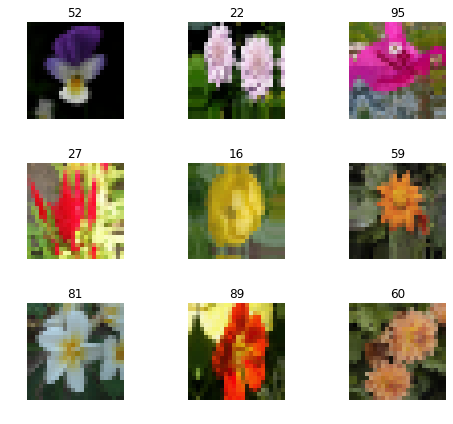

In [10]:
data.show_batch(rows=3,figsize=(7,6))

In [11]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 116MB/s]


In [12]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,4.119214,3.206697,0.730583,01:57
1,3.169126,2.673595,0.650216,01:57
2,2.787443,2.392218,0.608145,01:58


In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


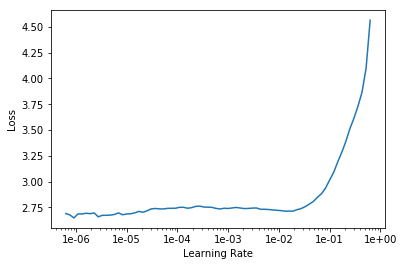

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(5,max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,2.660117,2.315792,0.581985,01:56
1,2.515946,2.123640,0.546926,01:55
2,2.294720,1.929394,0.505663,01:55
3,2.147030,1.840594,0.482470,01:54
4,2.094619,1.823554,0.482470,01:55


In [16]:
learn.fit_one_cycle(5,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,2.067779,1.836296,0.474380,01:54
1,2.019918,1.815555,0.470604,01:54
2,2.001197,1.779128,0.464132,01:55
3,1.989755,1.782995,0.467638,01:55
4,1.979640,1.755004,0.467368,01:54


In [17]:
interp = ClassificationInterpretation.from_learner(learn)

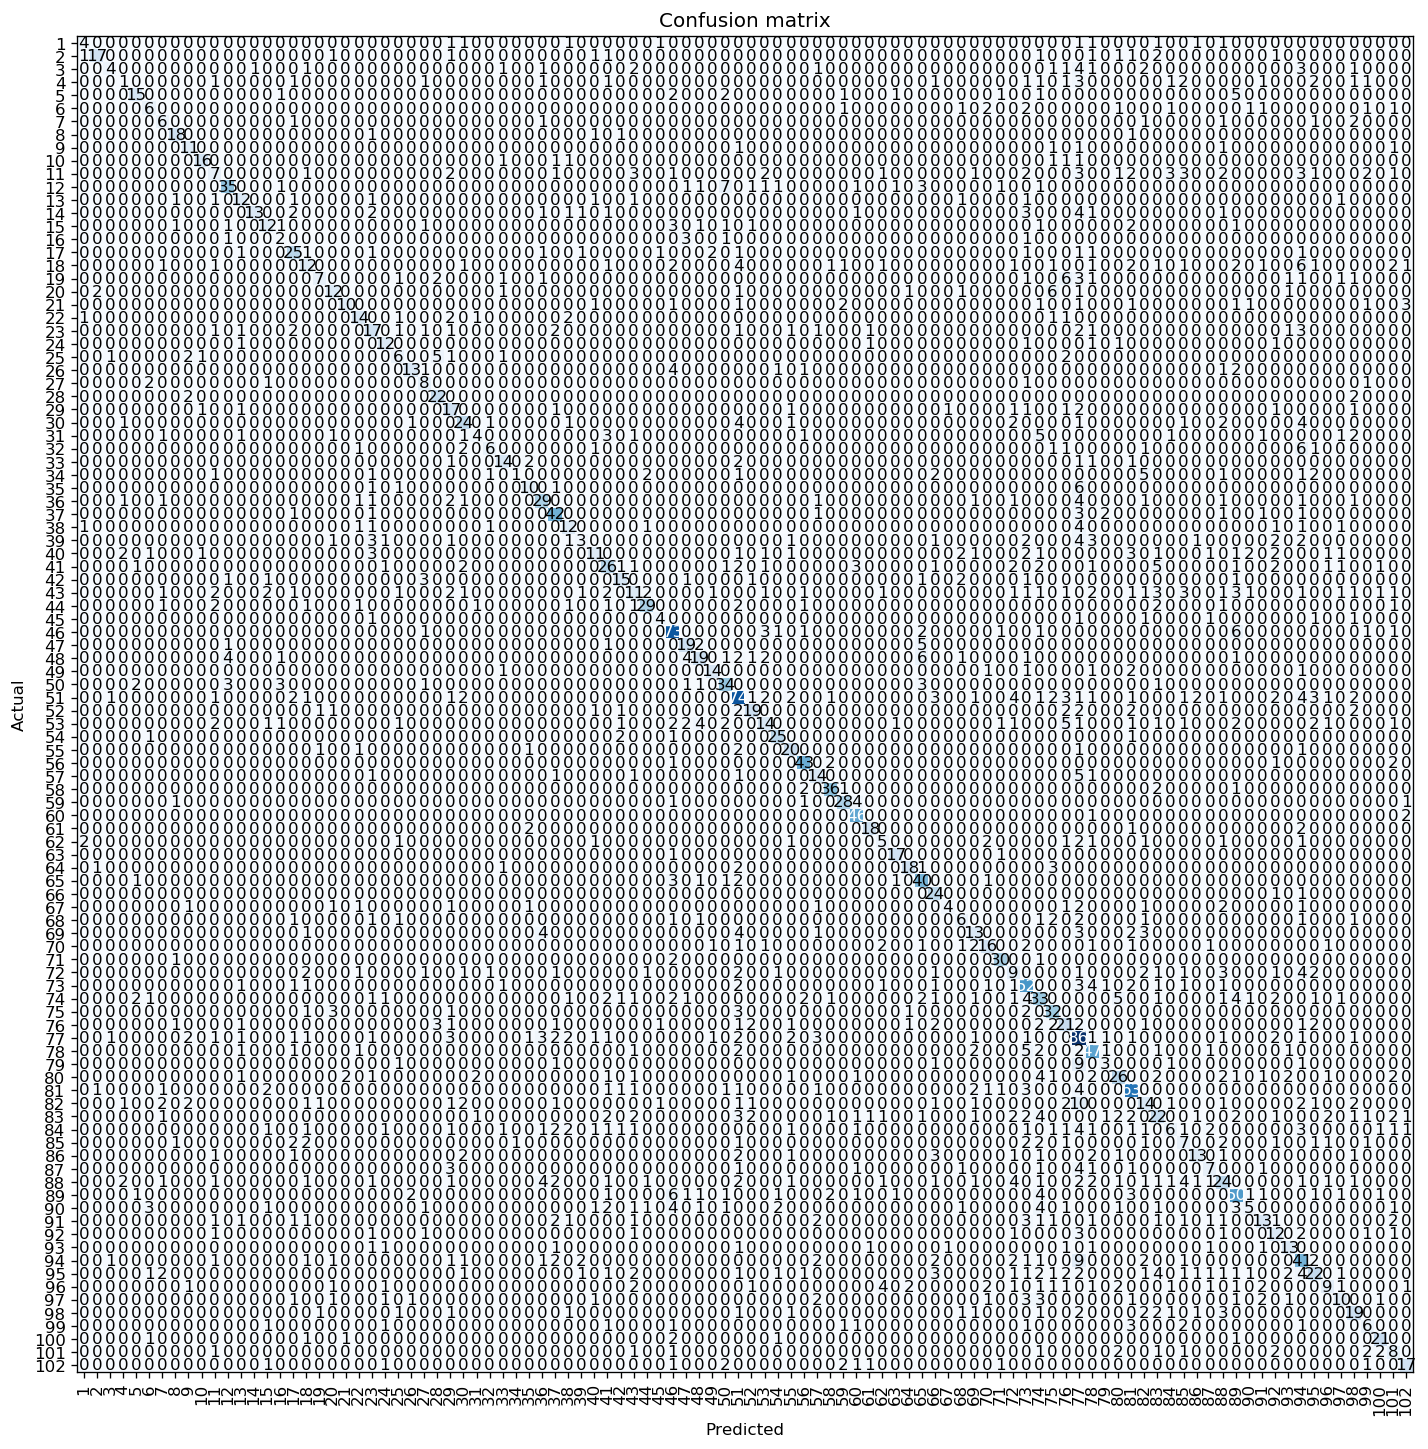

In [18]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=120)

In [19]:
interp.most_confused(min_val=1)

[(82, 77, 10),
 (79, 77, 9),
 (94, 77, 9),
 (12, 50, 7),
 (18, 94, 6),
 (19, 76, 6),
 (20, 75, 6),
 (32, 94, 6),
 (35, 77, 6),
 (46, 89, 6),
 (48, 65, 6),
 (89, 46, 6),
 (5, 89, 5),
 (25, 28, 5),
 (31, 74, 5),
 (34, 82, 5),
 (41, 83, 5),
 (47, 65, 5),
 (53, 76, 5),
 (57, 77, 5),
 (74, 80, 5),
 (78, 73, 5),
 (3, 77, 4),
 (14, 77, 4),
 (18, 51, 4),
 (26, 46, 4),
 (30, 51, 4),
 (30, 94, 4),
 (36, 77, 4),
 (38, 77, 4),
 (39, 77, 4),
 (48, 12, 4),
 (48, 47, 4),
 (51, 72, 4),
 (51, 94, 4),
 (53, 48, 4),
 (59, 60, 4),
 (69, 36, 4),
 (69, 51, 4),
 (72, 94, 4),
 (73, 78, 4),
 (74, 73, 4),
 (74, 89, 4),
 (80, 74, 4),
 (81, 77, 4),
 (83, 74, 4),
 (84, 77, 4),
 (87, 77, 4),
 (88, 36, 4),
 (88, 72, 4),
 (88, 85, 4),
 (89, 74, 4),
 (90, 46, 4),
 (90, 74, 4),
 (95, 83, 4),
 (95, 94, 4),
 (96, 62, 4),
 (3, 94, 3),
 (4, 77, 3),
 (11, 43, 3),
 (11, 77, 3),
 (11, 84, 3),
 (11, 85, 3),
 (11, 94, 3),
 (12, 65, 3),
 (14, 73, 3),
 (15, 46, 3),
 (16, 47, 3),
 (19, 77, 3),
 (21, 102, 3),
 (23, 94, 3),
 (31, 41

In [20]:
learn.unfreeze()

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


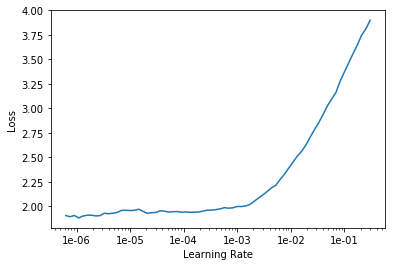

In [22]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(2, max_lr=slice(1e-7,1e-6))

epoch,train_loss,valid_loss,error_rate,time
0,1.962704,1.754371,0.461974,01:55
1,1.938728,1.757419,0.460086,01:56


In [24]:
learn.fit_one_cycle(3, max_lr=slice(1e-7,1e-6))

epoch,train_loss,valid_loss,error_rate,time
0,1.943304,1.747422,0.460626,01:55
1,1.982983,1.751398,0.461704,01:55
2,1.980353,1.759866,0.467368,01:55


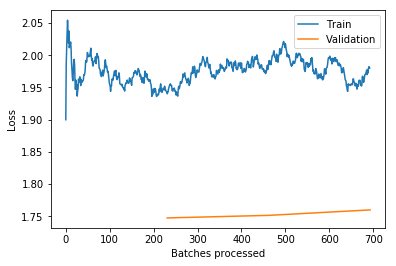

In [25]:
learn.recorder.plot_losses()

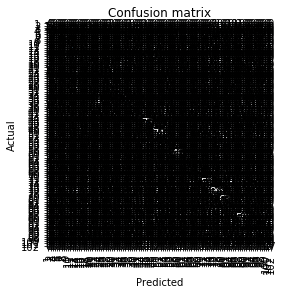

In [26]:
interp.plot_confusion_matrix(title='Confusion matrix')

In [27]:
preds,y, loss = learn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.5326321721076965 %.


In [28]:
learn.save("abc")

In [31]:
preds,y = learn.get_preds(ds_type=data, with_loss=False)

tensor([[6.2564e-05, 4.2937e-05, 7.1608e-04,  ..., 6.1558e-05, 6.5392e-05,
         3.0325e-04],
        [1.7011e-03, 5.3916e-03, 7.5790e-05,  ..., 7.4027e-06, 2.4512e-05,
         1.3853e-06],
        [1.6299e-04, 3.9985e-05, 6.9500e-05,  ..., 1.3030e-05, 3.0707e-05,
         1.1360e-06],
        ...,
        [1.1015e-05, 1.1477e-05, 5.8892e-05,  ..., 1.0205e-04, 1.6707e-04,
         2.3836e-05],
        [3.9894e-03, 5.3196e-04, 1.2794e-05,  ..., 2.6619e-04, 1.1714e-04,
         2.4701e-06],
        [1.0539e-02, 5.2974e-03, 1.9320e-03,  ..., 1.1593e-02, 3.0489e-03,
         2.0103e-02]])